<a href="https://colab.research.google.com/github/RohanKulkarni100/StockPricePrediction/blob/main/Trending_Chart_Pattern_Analysis(Minded_Hack)_Sample_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleData4.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'open', 'close', 'high', 'low', 'date'], dtype='object')

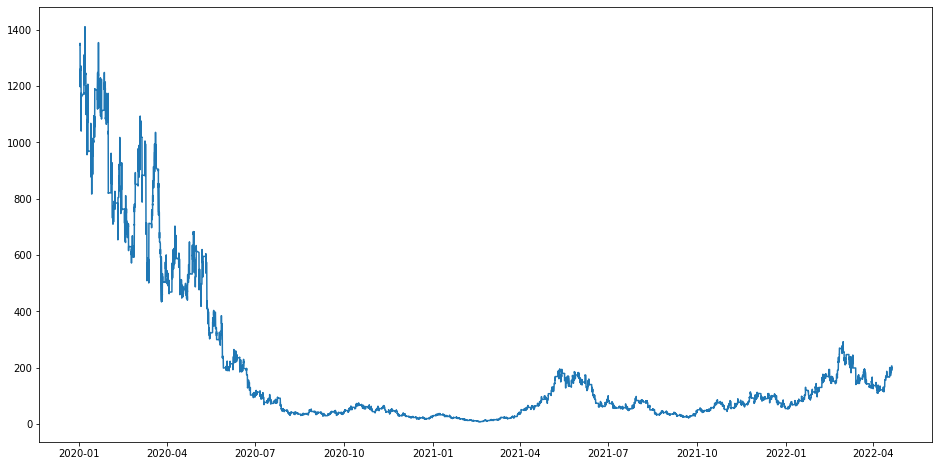

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price ')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
# Splitting the date part from DataFrame
df['Date'] = [d.date() for d in df['date']]

# Splitting the time part from DataFrame
df['Time'] = [d.time() for d in df['date']]

In [ ]:
df.head()

,Unnamed: 0,open,close,high,low,date,Date,Time
date,,,,,,,,
2020-01-02 09:00:00,0,1342.100000,1345.085221,1348.659736,1338.525485,2020-01-02 09:00:00,2020-01-02,09:00:00
2020-01-02 09:05:00,1,1345.085221,1348.165442,1349.693272,1343.557391,2020-01-02 09:05:00,2020-01-02,09:05:00
2020-01-02 09:10:00,2,1348.165442,1348.964998,1358.769402,1338.361038,2020-01-02 09:10:00,2020-01-02,09:10:00
2020-01-02 09:15:00,3,1348.964998,1351.860000,1359.948187,1340.876811,2020-01-02 09:15:00,2020-01-02,09:15:00
2020-01-02 09:20:00,4,1351.860000,1351.072686,1354.970295,1347.962392,2020-01-02 09:20:00,2020-01-02,09:20:00


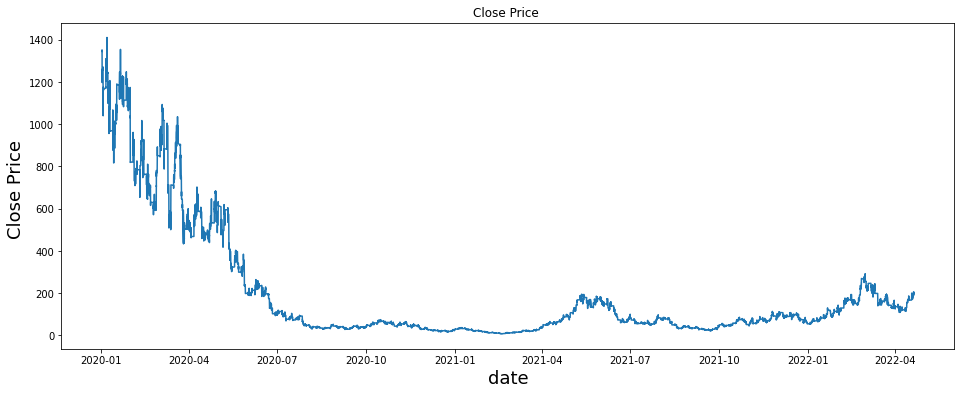

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price ')
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

41020

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.9531867 ],
       [0.95538111],
       [0.95595073],
       ...,
       [0.14009103],
       [0.14124216],
       [0.14167729]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.9531867 , 0.95538111, 0.95595073, 0.95801318, 0.95745228,
       0.95298319, 0.95403821, 0.95366552, 0.95201194, 0.94977809,
       0.94791109, 0.94612669, 0.94672815, 0.94378464, 0.94117314,
       0.94116024, 0.93883283, 0.93117545, 0.93228776, 0.93077665,
       0.9301775 , 0.92459376, 0.9240274 , 0.91826408, 0.91689241,
       0.91436609, 0.91358129, 0.91066323, 0.91102496, 0.90564882,
       0.9044685 , 0.90234483, 0.87585404, 0.86289167, 0.848087  ,
       0.8634748 , 0.86128847, 0.87040552, 0.87656142, 0.88130307,
       0.87073673, 0.86759358, 0.85811947, 0.85164065, 0.8691138 ,
       0.87904079, 0.89031683, 0.88888857, 0.88645429, 0.88690642,
       0.88734887, 0.88241585, 0.8819191 , 0.87937365, 0.87919678,
       0.87923161, 0.87928952, 0.88020244, 0.88405918, 0.88252425])]
[0.8843270658674672]

[array([0.9531867 , 0.95538111, 0.95595073, 0.95801318, 0.95745228,
       0.95298319, 0.95403821, 0.95366552, 0.95201194, 0.94977809,
       0.94791109, 0.94612669, 0.946

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

40960/40960 [==============================] - 1891s 46ms/step - loss: 1.9101e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

68/68 [==============================] - 4s 44ms/step


5.7499143634969645

<ipython-input-14-c624982ab269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


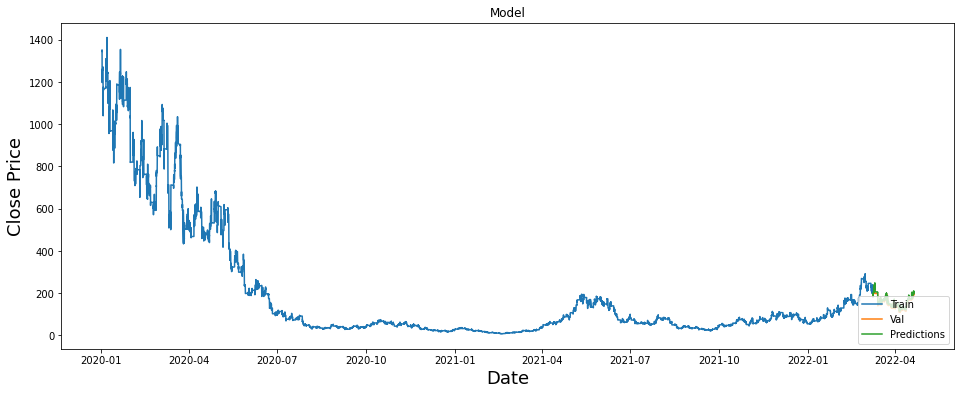

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,close,Predictions
date,,
2022-03-09 14:30:00,187.370071,197.449387
2022-03-09 14:35:00,185.742328,191.724640
2022-03-09 14:40:00,189.329009,189.934647
2022-03-09 14:45:00,194.095965,194.589340
2022-03-09 14:50:00,198.371301,200.532150
...,...,...
2022-04-20 14:35:00,200.319846,206.686295
2022-04-20 14:40:00,204.116677,205.000824
2022-04-20 14:45:00,203.767022,208.073746
